# Udacity Project: Writing a Data Science Blog Post

In [101]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

## Introduction

### Dataset
For this project, the Seattle Airbnb Dataset was chosen. 

Since 2008, Airbnb has been facilitating a distinctive and personalized way of travel for both guests and hosts. This dataset, a component of the Airbnb Inside initiative, outlines the listing activity of homestays in Seattle, WA.

The Seattle dataset encompasses the following Airbnb activities:
* Listings, comprising comprehensive descriptions and average review scores.
* Reviews, featuring unique identifiers for each reviewer along with detailed comments.
* Calendar, incorporating listing IDs, daily prices, and availability information.


### Business Background and Questions 

This dataset could be utilized by an investor seeking to purchase a condominium and lease it through Airbnb. The investor may be interested in determining the optimal district for acquiring a flat and strategies for achieving a high occupancy rate.

Key business questions are:

* Which neighborhoods in Seattle are the most popular?
* What are the peak and off-peak months in terms of expense and activity for staying in an Airbnb in Seattle?
* What variables hold the most significance in attaining a high occupancy rate?

## Gathering Data

In [102]:
# import datasets

input_path = Path('archive')

df_calendar = pd.read_csv(input_path/'calendar.csv', sep=',')
df_listings = pd.read_csv(input_path/'listings.csv', sep=',')
df_reviews = pd.read_csv(input_path/'reviews.csv', sep=',')

## Discovering Datasets

### Calender

In [103]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [104]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [105]:
df_calendar.available.value_counts()

available
t    934542
f    459028
Name: count, dtype: int64

In [106]:
df_calendar.price.dropna()

0          $85.00
1          $85.00
9          $85.00
10         $85.00
14         $85.00
            ...  
1393207    $87.00
1393208    $87.00
1393211    $87.00
1393212    $87.00
1393213    $87.00
Name: price, Length: 934542, dtype: object

### Listings

In [107]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [108]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

### Reviews

In [109]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [110]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


## Cleaning Data

In [111]:
# df_calendar

# transform price to float
df_calendar.price = df_calendar.price.str.replace('$', '')
df_calendar.price = df_calendar.price.str.replace(',', '').astype(float)


# convert string to datetime
df_calendar.date = pd.to_datetime(df_calendar.date)

In [112]:
df_calendar.date.min(), df_calendar.date.max()

(Timestamp('2016-01-04 00:00:00'), Timestamp('2017-01-02 00:00:00'))

## Analyzing Data

In [113]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [114]:
# calculating the average price for each listing_id
df_avg_price = df_calendar[['listing_id', 'price']].groupby('listing_id').mean()
df_avg_price

,price
listing_id,
3335,120.000000
4291,82.000000
5682,53.944984
6606,92.849315
7369,85.000000
...,...
10332096,40.000000
10334184,120.000000
10339144,NaN


In [115]:
# calculating the days where the listing_id is booked out
#assumption: if the listing is not available, it is booked out

df_booked = df_calendar[df_calendar.available == 'f'].groupby('listing_id').count().available
df_booked

listing_id
3335         56
5682         56
7369        312
9460        308
9531        185
           ... 
10319529    364
10331249     11
10334184      4
10339144    365
10340165      7
Name: available, Length: 3140, dtype: int64

In [116]:
# merge dataframes
merged_df = pd.merge(df_booked, df_avg_price, on=['listing_id'], how='inner')
merged_df.rename(columns={'price': 'avg_price', 'available': 'days_booked'}, inplace=True)
merged_df

,days_booked,avg_price
listing_id,,
3335,56,120.000000
5682,56,53.944984
7369,312,85.000000
9460,308,113.736842
9531,185,169.500000
...,...,...
10319529,364,49.000000
10331249,11,45.000000
10334184,4,120.000000


In [117]:
# merge dataframes to listings
df_listings = pd.merge(df_listings, merged_df, left_on='id', right_on='listing_id', how='inner')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,days_booked,avg_price
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,NaN,WASHINGTON,f,moderate,f,f,2,4.07,19,85.000000
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,NaN,WASHINGTON,f,strict,t,t,6,1.48,74,170.931271
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,NaN,WASHINGTON,f,strict,f,f,2,1.15,145,1301.818182
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,WASHINGTON,f,flexible,f,f,1,NaN,222,100.000000
4,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,NaN,WASHINGTON,f,strict,f,f,1,2.45,63,125.629139


In [118]:
df_listings['neighbourhood_group_cleansed'].value_counts()

neighbourhood_group_cleansed
Other neighborhoods    646
Downtown               477
Capitol Hill           466
Central Area           290
Queen Anne             263
Ballard                205
West Seattle           168
Rainier Valley         137
Beacon Hill             90
University District     78
Cascade                 75
Delridge                62
Northgate               62
Lake City               47
Magnolia                39
Seward Park             30
Interbay                 5
Name: count, dtype: int64

In [119]:
df_listings.avg_price

0         85.000000
1        170.931271
2       1301.818182
3        100.000000
4        125.629139
           ...     
3135     359.000000
3136     100.201465
3137      87.886364
3138      99.000000
3139      87.000000
Name: avg_price, Length: 3140, dtype: float64

In [120]:
#popular in terms of df_avg_price

columns = ['neighbourhood_group_cleansed', 'avg_price']

df_neighbourhood_avgprice = df_listings[columns].groupby('neighbourhood_group_cleansed').mean()
df_neighbourhood_avgprice = df_neighbourhood_avgprice.sort_values('avg_price', ascending=False)
df_neighbourhood_avgprice

,avg_price
neighbourhood_group_cleansed,
Magnolia,187.163842
Downtown,177.693668
Queen Anne,166.321899
Cascade,147.152582
West Seattle,145.251763
Capitol Hill,135.891009
Central Area,131.702636
Other neighborhoods,128.856905
Ballard,124.835619


In [121]:
df_neighbourhood_avgprice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Magnolia to Delridge
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   avg_price  17 non-null     float64
dtypes: float64(1)
memory usage: 272.0+ bytes


/var/folders/ml/jnncc33j5b34g26mm7srrjhr0000gn/T/ipykernel_8837/1749394060.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=df_neighbourhood_avgprice.index , y=df_neighbourhood_avgprice.avg_price, data=df_neighbourhood_avgprice, palette='BuGn_r', edgecolor='grey')


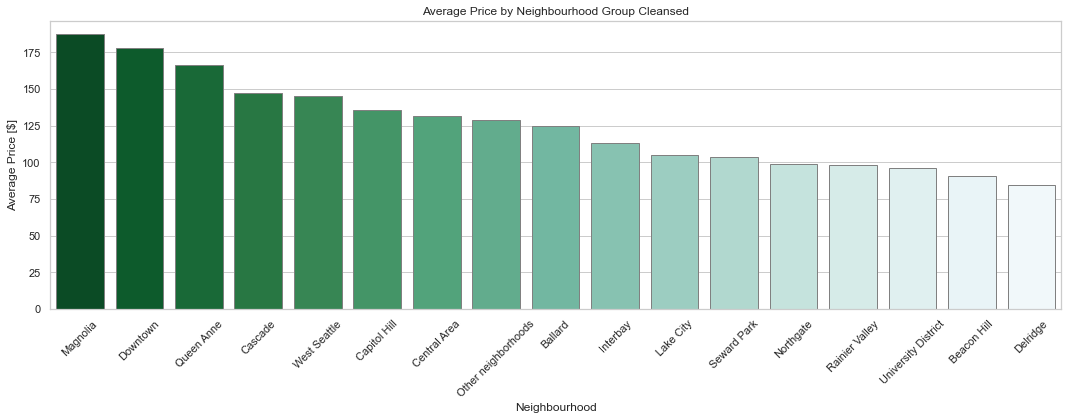

In [122]:
sns.set(style="whitegrid")

# Create a barplot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(x=df_neighbourhood_avgprice.index , y=df_neighbourhood_avgprice.avg_price, data=df_neighbourhood_avgprice, palette='BuGn_r', edgecolor='grey')

# Adding labels and title
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price [$]')
plt.title('Average Price by Neighbourhood Group Cleansed')

plt.xticks(rotation=45)

# Adjust layout to prevent clipping of rotated labels
plt.tight_layout()

# Show the plot
plt.show()

The neighborhoods with the highest average price per night are Magnolia, Downtown, and Queen Anne.

In [123]:
# popular in terms of occupation

columns = ['neighbourhood_group_cleansed', 'days_booked']

df_neighbourhood_daysbooked = df_listings[columns].groupby('neighbourhood_group_cleansed').mean()
df_neighbourhood_daysbooked = df_neighbourhood_daysbooked.sort_values('days_booked', ascending=False)
df_neighbourhood_daysbooked

,days_booked
neighbourhood_group_cleansed,
Cascade,183.573333
Seward Park,171.300000
Capitol Hill,159.414163
Queen Anne,155.403042
Central Area,152.168966
Other neighborhoods,147.289474
University District,145.923077
Beacon Hill,142.222222
Downtown,141.981132


/var/folders/ml/jnncc33j5b34g26mm7srrjhr0000gn/T/ipykernel_8837/3356733386.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=df_neighbourhood_daysbooked.index , y=df_neighbourhood_daysbooked.days_booked, data=df_neighbourhood_daysbooked, palette='BuGn_r', edgecolor='grey')


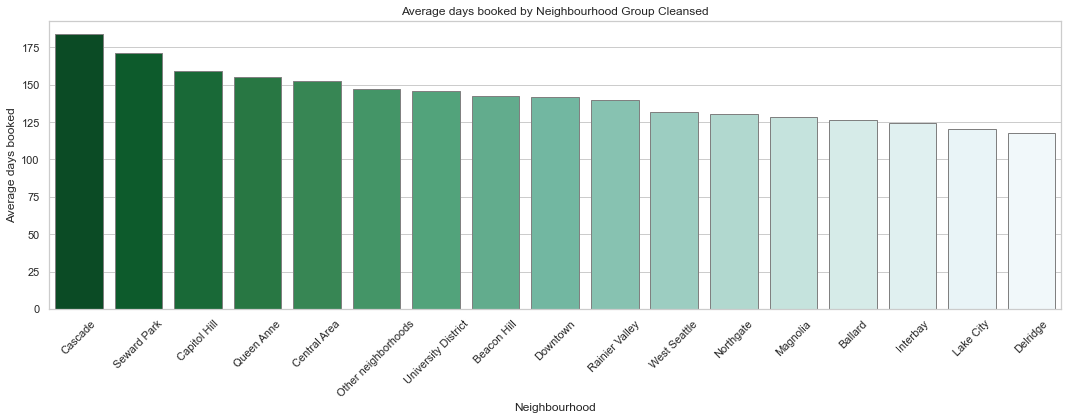

In [124]:
sns.set(style="whitegrid")

# Create a barplot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(x=df_neighbourhood_daysbooked.index , y=df_neighbourhood_daysbooked.days_booked, data=df_neighbourhood_daysbooked, palette='BuGn_r', edgecolor='grey')

# Adding labels and title
plt.xlabel('Neighbourhood')
plt.ylabel('Average days booked')
plt.title('Average days booked by Neighbourhood Group Cleansed')
plt.xticks(rotation=45)

# Adjust layout to prevent clipping of rotated labels
plt.tight_layout()

# Show the plot
plt.show()

The neighborhoods with the highest booking rates are Cascade, Seward Park and Capitol Hill.

Queen Anne is a neighborhood that performs well in average price and booking rate is. It is placed 4th in terms of booking rate and placed 3rd in terms of avergade price.


In [125]:
# how much does the average price change with the month

df_calendar['month'] = df_calendar.date.apply(lambda x: x.month)

In [126]:
df_calendar_month_price = df_calendar[['month', 'price']].groupby('month').mean()
df_calendar_month_price

,price
month,
1,122.912176
2,124.293927
3,128.644488
4,135.097005
5,139.538183
6,147.473137
7,152.094150
8,150.656594
9,143.255949


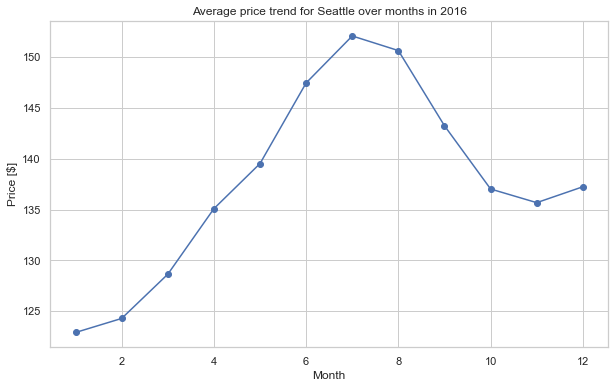

In [127]:
plt.figure(figsize=(10, 6))
plt.plot(df_calendar_month_price.index, df_calendar_month_price['price'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Price [$]')
plt.title('Average price trend for Seattle over months in 2016')

# Show the plot
plt.show()

The average price is high in the summer months and peaks in July.

In [128]:
df_calendar['booked'] = df_calendar['available'].map({'t': False, 'f': True})
df_calendar_bookingspermonth = df_calendar[['month', 'booked']].groupby('month').sum()

In [129]:
df_calendar_bookingspermonth

,booked
month,
1,49603
2,37401
3,34420
4,38503
5,38387
6,37296
7,44136
8,42011
9,37294


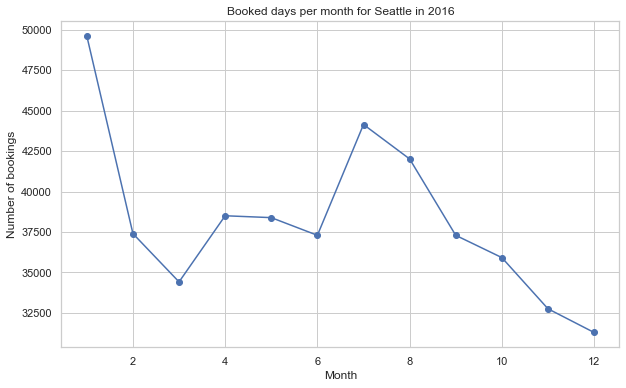

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(df_calendar_bookingspermonth.index, df_calendar_bookingspermonth['booked'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Number of bookings')
plt.title('Booked days per month for Seattle in 2016')

# Show the plot
plt.show()

The number of Airbnb bookings in Seattle have a peak in January and a smaller peak in July.

### Linear Regression

In [131]:
# choosing relevant colummns for the following investigation of the dataset

df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 94 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3140 non-null   int64  
 1   listing_url                       3140 non-null   object 
 2   scrape_id                         3140 non-null   int64  
 3   last_scraped                      3140 non-null   object 
 4   name                              3140 non-null   object 
 5   summary                           3010 non-null   object 
 6   space                             2708 non-null   object 
 7   description                       3140 non-null   object 
 8   experiences_offered               3140 non-null   object 
 9   neighborhood_overview             2353 non-null   object 
 10  notes                             1870 non-null   object 
 11  transit                           2425 non-null   object 
 12  thumbn

In [132]:
df_model = df_listings[['days_booked', 'experiences_offered', 'host_is_superhost', 'room_type', 'square_feet', 'cleaning_fee', 'number_of_reviews', 'review_scores_rating', 'bathrooms', 'bedrooms', 'beds']]
df_model.head()

,days_booked,experiences_offered,host_is_superhost,room_type,square_feet,cleaning_fee,number_of_reviews,review_scores_rating,bathrooms,bedrooms,beds
0,19,none,f,Entire home/apt,NaN,NaN,207,95.0,1.0,1.0,1.0
1,74,none,t,Entire home/apt,NaN,$40.00,43,96.0,1.0,1.0,1.0
2,145,none,f,Entire home/apt,NaN,$300.00,20,97.0,4.5,5.0,7.0
3,222,none,f,Entire home/apt,NaN,NaN,0,NaN,1.0,0.0,2.0
4,63,none,f,Private room,NaN,$40.00,17,95.0,1.0,1.0,1.0


In [133]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   days_booked           3140 non-null   int64  
 1   experiences_offered   3140 non-null   object 
 2   host_is_superhost     3138 non-null   object 
 3   room_type             3140 non-null   object 
 4   square_feet           78 non-null     float64
 5   cleaning_fee          2335 non-null   object 
 6   number_of_reviews     3140 non-null   int64  
 7   review_scores_rating  2662 non-null   float64
 8   bathrooms             3132 non-null   float64
 9   bedrooms              3136 non-null   float64
 10  beds                  3140 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 270.0+ KB


In [134]:
df_model.experiences_offered.value_counts()

experiences_offered
none    3140
Name: count, dtype: int64

In [135]:
df_model.host_is_superhost.value_counts()

host_is_superhost
f    2447
t     691
Name: count, dtype: int64

In [136]:
df_model.room_type.value_counts()

room_type
Entire home/apt    2209
Private room        857
Shared room          74
Name: count, dtype: int64

In [137]:
df_model['host_is_superhost'] = df_model['host_is_superhost'].map({'t': True, 'f': False})

/var/folders/ml/jnncc33j5b34g26mm7srrjhr0000gn/T/ipykernel_8837/1538270096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['host_is_superhost'] = df_model['host_is_superhost'].map({'t': True, 'f': False})


In [138]:
df_model.cleaning_fee = df_model.cleaning_fee.str.replace('$', '').astype(float)

/var/folders/ml/jnncc33j5b34g26mm7srrjhr0000gn/T/ipykernel_8837/800063849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.cleaning_fee = df_model.cleaning_fee.str.replace('$', '').astype(float)


#### Dealing with missing values

* The column 'experiences_offered' only has none as values and can be dropped.
* The column 'square_feet' has too many missing values and will not be considered in the linear regression.
* The missing values of the other columns will be replaced by the mean value of the corresponding column.


In [139]:
# dropping columns due to low data availability
df_model = df_model.drop('square_feet', axis=1)
df_model = df_model.drop('experiences_offered', axis=1)

In [140]:
# dropping rows due to missing data
df_model.dropna(subset=['host_is_superhost'], inplace=True)

In [141]:
df_model.review_scores_rating = df_model.review_scores_rating.fillna(df_model.review_scores_rating.mean())
df_model.cleaning_fee = df_model.cleaning_fee.fillna(df_model.cleaning_fee.mean())
df_model.bathrooms = df_model.bathrooms.fillna(df_model.bathrooms.mean())
df_model.bedrooms = df_model.bedrooms.fillna(df_model.bedrooms.mean())
df_model.beds = df_model.beds.fillna(df_model.beds.mean())

In [142]:
df_model.head()

,days_booked,host_is_superhost,room_type,cleaning_fee,number_of_reviews,review_scores_rating,bathrooms,bedrooms,beds
0,19,False,Entire home/apt,62.239503,207,95.000000,1.0,1.0,1.0
1,74,True,Entire home/apt,40.000000,43,96.000000,1.0,1.0,1.0
2,145,False,Entire home/apt,300.000000,20,97.000000,4.5,5.0,7.0
3,222,False,Entire home/apt,62.239503,0,94.881668,1.0,0.0,2.0
4,63,False,Private room,40.000000,17,95.000000,1.0,1.0,1.0


#### Dealing with categorical values


In [143]:
# create dummy columns
dummy_cols_df = pd.get_dummies(df_model['room_type'], dummy_na=False)

In [144]:
df_model = pd.concat([df_model, dummy_cols_df], axis=1)
df_model = df_model.drop('room_type', axis=1)

#### Build Model

In [145]:
# define explanatory and response variables

y = df_model['days_booked']
X = df_model.drop('days_booked', axis=1)

In [146]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [147]:
#lm_model = LinearRegression(normalize=True) # Instantiate
lm_model = LinearRegression() # Instantiate

lm_model.fit(X_train, y_train) #Fit

y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [148]:
test_score, train_score

(0.047065082020610105, 0.05102155520582308)

An R² value of 0.047065 is quite low. It suggests that only about 4.706% of the variance in the dependent variable can be explained by the independent variables in the linear regression model. This indicates that the linear relationship is weak or that there are other factors influencing the dependent variable that are not considered in the current model.

In [149]:
# Undderstanding the most influential coefficients of the linear model

coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)

In [150]:
coefs_df.head(10)

,est_int,coefs,abs_coefs
7,Entire home/apt,21.523267,21.523267
9,Shared room,-20.451712,20.451712
5,bedrooms,17.836003,17.836003
6,beds,-7.367737,7.367737
4,bathrooms,-7.228281,7.228281
0,host_is_superhost,4.784858,4.784858
8,Private room,-1.071556,1.071556
2,number_of_reviews,-0.594279,0.594279
1,cleaning_fee,-0.408244,0.408244
3,review_scores_rating,-0.004383,0.004383


In summary of the linear regression coefficients, an entire home/apartment exhibits the most significant positive impact, while shared room has the highest negative effect. Surprisingly, the number of bedrooms demonstrates a positive influence, whereas the number of beds shows a negative impact, presenting a somewhat paradoxical relationship.

Additionally, being a super host is advantageous, contributing positively to the occupancy rate, while the remaining variables appear to lack a substantial impact.

## Conclusion

In this Udacity project, the dataset was analyzed to address key business questions for potential Airbnb investors in Seattle. The focus included identifying optimal districts and strategies for achieving high occupancy rates. Here are the main findings:

1) Popular Neighborhoods:
* Magnolia, Downtown, and Queen Anne had the highest average nightly prices.
* Cascade, Seward Park, and Capitol Hill stood out with the highest booking rates.

2) Peak and Off-Peak Months:
* Summer months, especially July, exhibited peak average prices.
* Booking activity peaked in January and had a smaller peak in July.

3) Variables Influencing Occupancy Rate:
* A linear regression model highlighted factors influencing the occupancy rate.
* Notably, entire home/apartment had a significant positive impact, while shared room had the highest negative effect.
* An intriguing paradox was observed: the number of bedrooms positively influenced occupancy, while the number of beds had a negative impact.
* Being a super host was identified as advantageous for a positive impact on the occupancy rate.

In summary, while certain factors influenced occupancy rates, the dataset suggested the presence of unexplored variables. Investors should consider a comprehensive approach, considering neighborhood popularity, seasonal pricing dynamics, and the nuanced impact of property features on occupancy rates.